In [1]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path_to_events_file = 'save/summary/events.out.tfevents.1569762525.tf114'

In [6]:
from tqdm import tqdm
import pandas as pd

In [7]:
# for e in tf.train.summary_iterator(path_to_events_file):
#     for v in e.summary.value:
#         print(v.tag)
# #         if v.tag == 'loss' or v.tag == 'accuracy':
# #             print(v.simple_value)

runlog = pd.DataFrame(columns=['metric', 'value'])
try:
    for e in tqdm(tf.train.summary_iterator(path_to_events_file)):
        for v in e.summary.value:
            r = {'metric': v.tag, 'value':v.simple_value}
            runlog = runlog.append(r, ignore_index=True)

# Dirty catch of DataLossError
except:
    print('Event file possibly corrupt: {}'.format(path))

    


2643it [01:14, 35.50it/s]


In [8]:
runlog['epoch'] = [item for sublist in [[i]*8 for i in range(0, len(runlog)//8)] for item in sublist]

In [42]:
import numpy  as np
import mat

In [59]:
to_graph = ['D_img_loss_G', 'EG_loss', 'D_z_loss_z', 'E_z_loss','G_img_loss','D_img_loss_input','D_z_loss_prior']

In [62]:
i.replace("_","-")

'D-img-loss-G'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


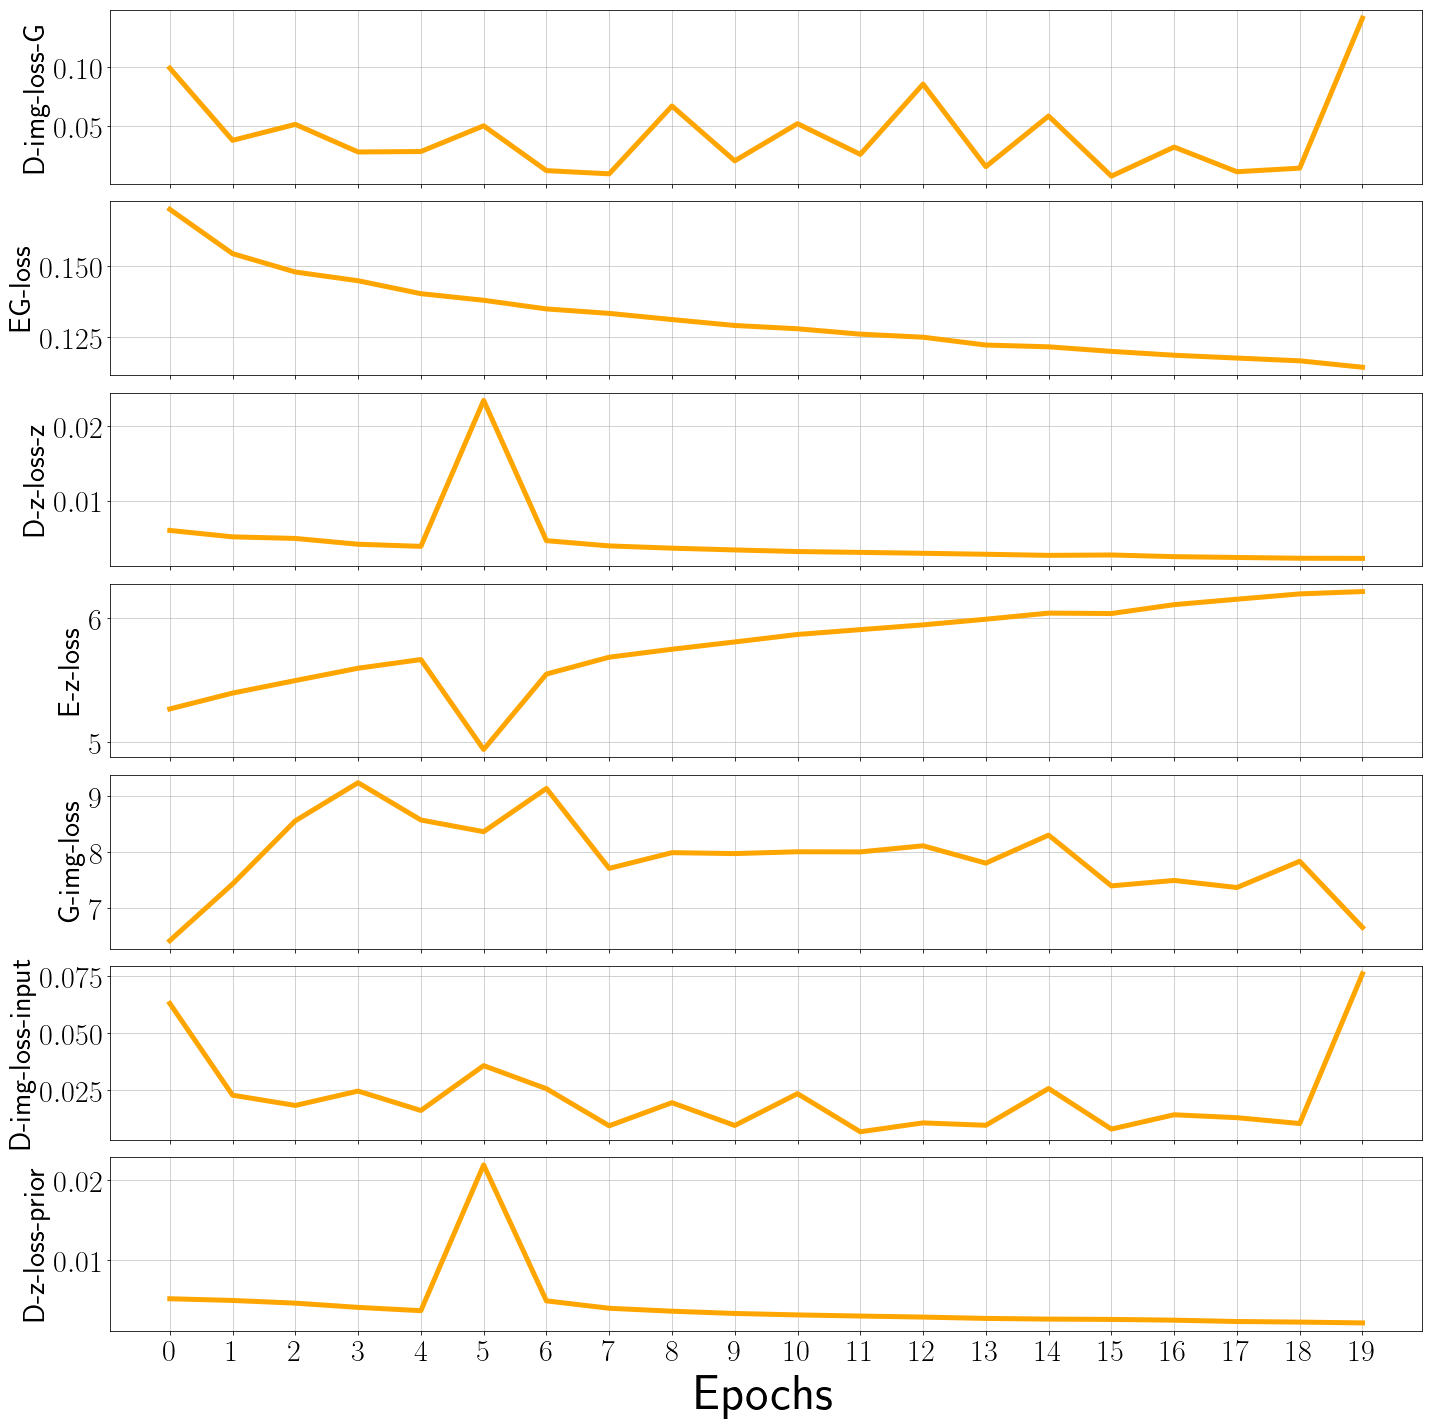

In [82]:
fig, axs = plt.subplots(nrows=len(to_graph), ncols=1, sharey= False, sharex=True, figsize=(20,20))
for c, i in enumerate(to_graph):
    x = runlog[runlog.metric==i]['value']
    name = i.replace("_","-")
    color = 'orange'
    axs[c].plot(np.mean(x.reshape(-1, 132), axis=1), color, linewidth=5)
    color = 'k'
    # Colorcode the tick tabs 
    axs[c].tick_params(axis='x', colors=color, labelsize=30)
    axs[c].tick_params(axis='y', colors=color, labelsize=30, rotation = 0)
    color = 'k'
    # Colorcode the spine of the graph
    axs[c].spines['bottom'].set_color(color)
    axs[c].spines['top'].set_color(color)
    axs[c].spines['left'].set_color(color)
    axs[c].spines['right'].set_color(color)
    # Put the title and labels
    plt.xlabel("Epochs", color=color, size=50)
    name = " ".join(name.split('_'))
    axs[c].set_ylabel(str(name), color=color, size=30, rotation = 90)
    axs[c].grid(alpha=0.7)
    axs[c].set_xticks(list(range(0,20)))
    
plt.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.1)
plt.savefig("results.pdf", bbox_layout='tight')